In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

import pickle
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head(20)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
5,6,1,20,50,0.169698,27.259866,0,12.867706
6,7,1,20,50,0.203708,27.127486,0,14.695562
7,8,1,20,50,0.237723,26.807732,0,15.890699
8,9,1,20,50,0.271776,27.864715,0,15.539188
9,10,1,20,50,0.305732,28.313036,0,15.750094


In [4]:
test_data = pd.read_csv('test.csv')
test_data.head(20)

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
5,6,0,5,20,0.159557,30.486938,0
6,7,0,5,20,0.191471,33.545950,0
7,8,0,5,20,0.223402,35.717600,0
8,9,0,5,20,0.255337,36.971061,0
9,10,0,5,20,0.287230,37.542219,0


In [5]:
data_train = train_data.copy()
data_train.drop(columns=['id', 'breath_id', 'time_step'], axis = 1, inplace = True)

In [6]:
X = data_train.drop(columns='pressure')

y = data_train['pressure']


Split the train dataset into train and test dataset. We have reserved 30% of the dataset for checking the accuracy of the trained model. Independent train and test dataset are further scaled to make sure that the input data is standard normally distributed are centred around zero and have variance in the same order.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
print('Dimension of X_train:', X_train.shape,'\nDimension of X_test:', X_test.shape,'\nDimension of y_train:', y_train.shape,'\nDimension of y_test:', y_test.shape)

Dimension of X_train: (4225200, 4) 
Dimension of X_test: (1810800, 4) 
Dimension of y_train: (4225200,) 
Dimension of y_test: (1810800,)


# Artificial Neural Networks (ANN)
**Neural networks** are a powerful set of machine learning algorithms, used to solve a lot of challenging artificial intelligence problems. They often outperform traditional machine learning models because they have the advantages of non-linearity, variable interactions, and customizability. 

Neural network use one or more **hidden layers** of multiple **hidden units** to perform **function approximation**. The use of multiple hidden units in one or more layers, allows neural networks to approximate complex functions. Neural network models capable of approximating complex functions are said to have high **model capacity**. This property allows neural networks to solve complex machine learning problems. 

However, because of the large number of hidden units, neural networks have many **weights** or **parameters**. This situation often leads to **over-fitting** of neural network models, which limits generalization. Thus, finding optimal hyperparameters when fitting neural network models is essential for good performance. 

An additional issue with neural networks is **computational complexity**. Many optimization iterations are required. Each optimization iteration requires the update of a large number of parameters.  

# Multi-layer Perceptron (MLP)
**Multi-layer Perceptron** is a fully-connected class of feedforward **artificial neural network (ANN)**. It contains input and output layers, as well as one or more hidden layers with numerous neurons layered on top of each other.

If the data is not normalised, the neural network may have problems converging before the maximum number of iterations permitted. Because **Multi-layer Perceptron** is sensitive to feature scaling, scaling data is necessary for MLP. The dataset is standardized using Scikit-learn built-in "StandardScaler" to scale the data as different features(independent variables) have wide value range scale. 

In [8]:
sc = StandardScaler()

# Fit only to the training data
scaler = sc.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train = X_train[:80000]
y_train = y_train[:80000]

### Hyperparameter Tuning
**Hyperparameter Turning** aims to get the best parameters for the models training. A hyperparameter is a parameter whose value is set before the learning process begins. Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. In this section, we have utilized the Exhaustive Grid Search from Scikit learn, which is one of the most popular and traditional way of performing hyperparameter tuning. Every combination of each set of hyperparameters is tested using this method. This approach allows us to locate the optimal set of values inside the parameter search space. Since this approach must test every combination in the grid size, it often consumes more computational resources and takes a long time to execute.

Using Scikit learn's GridSearchCV function would run the grid search to test all possible set of hyperparameters over the grid.

In [10]:
%%time
MLPR_model = GridSearchCV(
    estimator = MLPRegressor(), 
    param_grid = {
        'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
        'max_iter': [50, 100, 2000],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'],
    }, 
    scoring = 'neg_mean_absolute_error',
    n_jobs= -1, 
    cv=5
)

MLPR_result = MLPR_model.fit(X_train, y_train)

# save the model to disk
filename = 'MLPR_result.sav'
pickle.dump(MLPR_result, open(filename, 'wb'))

# load the model from disk
# grid = pickle.load(open(filename, 'rb'))

#summarize result
print("Best Score: %s" % MLPR_result.best_score_)
print("Best Hyperparameters: %s" % MLPR_result.best_params_) 

Best Score: -3.2844431824057763
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
Wall time: 2h 18min 20s


The best hyperparameters are found and the best score is defined. 

The best set of hyperparameters are used when defining the MLPRegressor based on the results of hyperparameter tuning.

The trained model is used to predict the target values of the reserved test dataset, which model has not seen before.

In [11]:
%%time
MLPR_predict = MLPR_model.predict(X_test)

Wall time: 12 s


### Model Evaluation
We will check the predicted score with the actual score to compute the accuracy of the model. 

In [12]:
MLPR_R2 = r2_score(y_test, MLPR_predict)
MLPR_MAPE = mape(y_test, MLPR_predict)
MLPR_MAE = mean_absolute_error(y_test, MLPR_predict)
MLPR_MSE = mean_squared_error(y_test, MLPR_predict)
MLPR_RMSE = np.sqrt(MLPR_MSE)

In [13]:
MLPR_results = pd.DataFrame({'R Squared': MLPR_R2,
                          'Mean Absolute Percentage Error': MLPR_MAPE,
                          'Mean Absolute Error': MLPR_MAE,
                          'Mean Squared Error': MLPR_MSE,
                          'Root Mean Squared Error': MLPR_RMSE}
                           ,index=['Multi-layer Perceptron'])
MLPR_results

,R Squared,Mean Absolute Percentage Error,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
Multi-layer Perceptron,0.498378,38.930796,3.27517,33.019166,5.746231


In [14]:
print("The Score with ", (r2_score(y_test, MLPR_predict)))
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': MLPR_predict})
df_temp.head()

The Score with  0.49837813411163


,Actual,Predicted
2862611,4.431449,4.851634
376322,11.813174,22.148589
242389,4.501751,4.944880
1865932,11.039850,19.703141
222084,11.039850,15.272209


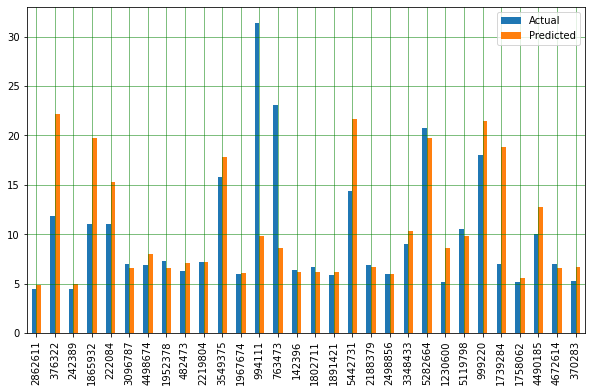

In [15]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

A bar chart is plotted to visualize the differences between the predicted data and actual data.

## Predict test data
The model is used to predict the pressure of the test dataset.

In [16]:
# X_testscaleddata = sc_X.fit_transform(test_data[['R','C','u_in','u_out']])
# pred_test = ANN_model.predict(X_testscaleddata)
# pred_test_result = pd.DataFrame({'pressure':pred_test.reshape(-1)})
# pred_test_result 